<h1>Using pandas DataFrames with the ArcGIS API for Python</h1>

This short tutorial covers how to use the ArcGIS API for Python and pandas DataFrame objects for displaying tabular data inside of your Jupyter Notebook application. After searching and referencing spatial data, you the pandas library enables you to subset, describe and plot attribute data. 
pandas is a Python package for data manipulation and analysis. It works particularly well with Jupyter Notebooks, where you can also use bash commands, magic commands, plotting capabilities and take advantage of a nice overall presentation of code, visuals and comments. The ArcGIS API for Python uses the pandas library to display and edit attribute info. Specifically, it uses pandas DataFrame objects that present data in a tabular form, comparable to Excel spreadsheets. 
To follow the instructions, you can open a new Jupyter Notebook. Make sure you have the latest available version of the API installed, which is version 1.3. 

<b>1.Import the module and GIS class</b>

First, we´ll login to ArcGIS Online using the Jupyter Notebook app:

In [1]:
import arcgis
from arcgis.gis import GIS
gis = GIS()

<b>2. Search for feature layer content</b>

Feature layers are collections of layers containing geographical features as vectors. We´ll search for a feature layer called “Bruce Trail” inside of ArcGIS Online:

In [2]:
search_result = gis.content.search(query="bruce trail", item_type="Feature Layer", max_items = 5)
search_result

[<Item title:"Bruce Trail" type:Feature Layer Collection owner:DufferinGIS>,
 <Item title:"MonoTrails" type:Feature Layer Collection owner:MonoIT>,
 <Item title:"TrailsBruceTrail" type:Feature Layer Collection owner:MonoIT>,
 <Item title:"Bruce_trail_1493841411247" type:Feature Layer Collection owner:Chiranjeev_Beniwal>,
 <Item title:"Formed Roads" type:Feature Layer Collection owner:joshua.thomson_ACTGOV>]

The item we’re interested in is the following item, returned as the third search result.

<b>3. Reference the item and create the DataFrame object</b>

We can reference this item as follows, in order to see how many layers it contains. Python returns only one item, so there´s only one layer.

In [7]:
bruce_trail_item = search_result[0]
bruce_trail_item.layers

[<FeatureLayer url:"https://services5.arcgis.com/C0BEdgagVaXzcw0W/arcgis/rest/services/Bruce_Trail_2017/FeatureServer/0">]

We´ll now create a variable that holds the DataFrame object from the layer we´re interested in. Using the head function in the second line, we´ll only print the first five rows.

In [8]:
btl_df = bruce_trail_item.layers[0].query().df
btl_df.head()

,Name,OBJECTID,PopupInfo,Shape__Length,SHAPE
0,Placemark,1,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",600.853125,"{'paths': [[[581612.5797, 4869788.1484], [5816..."
1,Placemark,2,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",722.753897,"{'paths': [[[574942.0451, 4875786.4482], [5749..."
2,Mad River Side Trail,3,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",102.395421,"{'paths': [[[564245.0435, 4910725.8358], [5642..."
3,Walter Tovell,4,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",471.296309,"{'paths': [[[573836.5058, 4877993.2709], [5738..."
4,South Outlier Loop,5,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...",1656.343658,"{'paths': [[[574612.6017, 4877271.9632], [5746..."


<b>4. Describe the item´s attribute data</b>

There are many functions to describe the data inside pandas DataFrame objects. For example, the shape function returns the amount of rows and columns of the entire DataFrame as a tuple:

In [9]:
btl_df.shape

(367, 5)

We can print the different column names as follows:

In [10]:
btl_df.columns

Index(['Name', 'OBJECTID', 'PopupInfo', 'Shape__Length', 'SHAPE'], dtype='object')

The .loc property can be used to subset entire rows, using the row´s index number, starting from zero. Here, we print the column names and values of the first item:

In [12]:
btl_df.loc[0]

Name                                                     Placemark
OBJECTID                                                         1
PopupInfo        <html xmlns:fo="http://www.w3.org/1999/XSL/For...
Shape__Length                                              600.853
SHAPE            {'paths': [[[581612.5797, 4869788.1484], [5816...
Name: 0, dtype: object

You can also access a separate cell value. For example, the PopupInfo value of the first item can be accessed as follows:

In [14]:
btl_df.loc[0]['PopupInfo']

'<html xmlns:fo="http://www.w3.org/1999/XSL/Format" xmlns:msxsl="urn:schemas-microsoft-com:xslt">\n\n<head>\n\n<META http-equiv="Content-Type" content="text/html">\n\n<meta http-equiv="content-type" content="text/html; charset=UTF-8">\n\n</head>\n\n<body style="margin:0px 0px 0px 0px;overflow:auto;background:#FFFFFF;">\n\n<table style="font-family:Arial,Verdana,Times;font-size:12px;text-align:left;width:100%;border-collapse:collapse;padding:3px 3px 3px 3px">\n\n<tr style="text-align:center;font-weight:bold;background:#9CBCE2">\n\n<td> </td>\n\n</tr>\n\n<tr>\n\n<td>\n\n<table style="font-family:Arial,Verdana,Times;font-size:12px;text-align:left;width:100%;border-spacing:0px; padding:3px 3px 3px 3px">\n\n<tr>\n\n<td>FID</td>\n\n<td>0</td>\n\n</tr>\n\n<tr bgcolor="#D4E4F3">\n\n<td>OBJECTID_1</td>\n\n<td>1</td>\n\n</tr>\n\n<tr>\n\n<td>ST_Class</td>\n\n<td></td>\n\n</tr>\n\n<tr bgcolor="#D4E4F3">\n\n<td>TRAIL_TYPE</td>\n\n<td>Main Trail</td>\n\n</tr>\n\n<tr>\n\n<td>TRAIL_NAME</td>\n\n<td></

The outcome looks like XML data inside a HTML file and is not very readable for humans. We can use the HTML library to return the same output in a more readable way:

In [15]:
from IPython.display import HTML
HTML(btl_df.loc[0]['PopupInfo'])

<b>5. Create a histogram</b>

We can also create a histogram using the shape length field as input. The first line of the code below is a magic command that enable the use of plotting capabilities inside the Jupyter Notebook application:

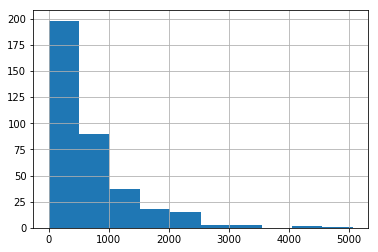

In [16]:
%matplotlib inline
import matplotlib.pyplot as pd
btl_df['Shape__Length'].hist()